# 피마족 인디언 당뇨병 발병 유무 예측하는 이진 분류 문제

* 8개 변수를 독립변수로 보고 당뇨병 발병 유무를 예측하는 이진 분류 문제로 정의(결과로 1이면 당뇨병, 0이면 아님)


* 내가 예측할 값은 1로 설정


## 1.데이터 준비하기

In [ ]:
import numpy as np
import pandas as pd

#시각화
import seaborn as sns
import matplotlib.pyplot as plt

#모델 학습
import tensorflow as tf
from keras.models import Sequential  #층을 쌓기?
from keras.layers import Dense       #층을 만들기
from sklearn.model_selection import train_test_split #sklearn 사이킷런

In [ ]:
dataset=pd.read_csv('/content/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2.데이터 전처리

* 총개수
* 결측치
* object 타입 확인

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 탐색적 데이터 분석 EDA
* 차트를 시각적으로 표현해서 살펴보기 → 0과1의 비슷함 비교
* 데이터 불균형 확인하기


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


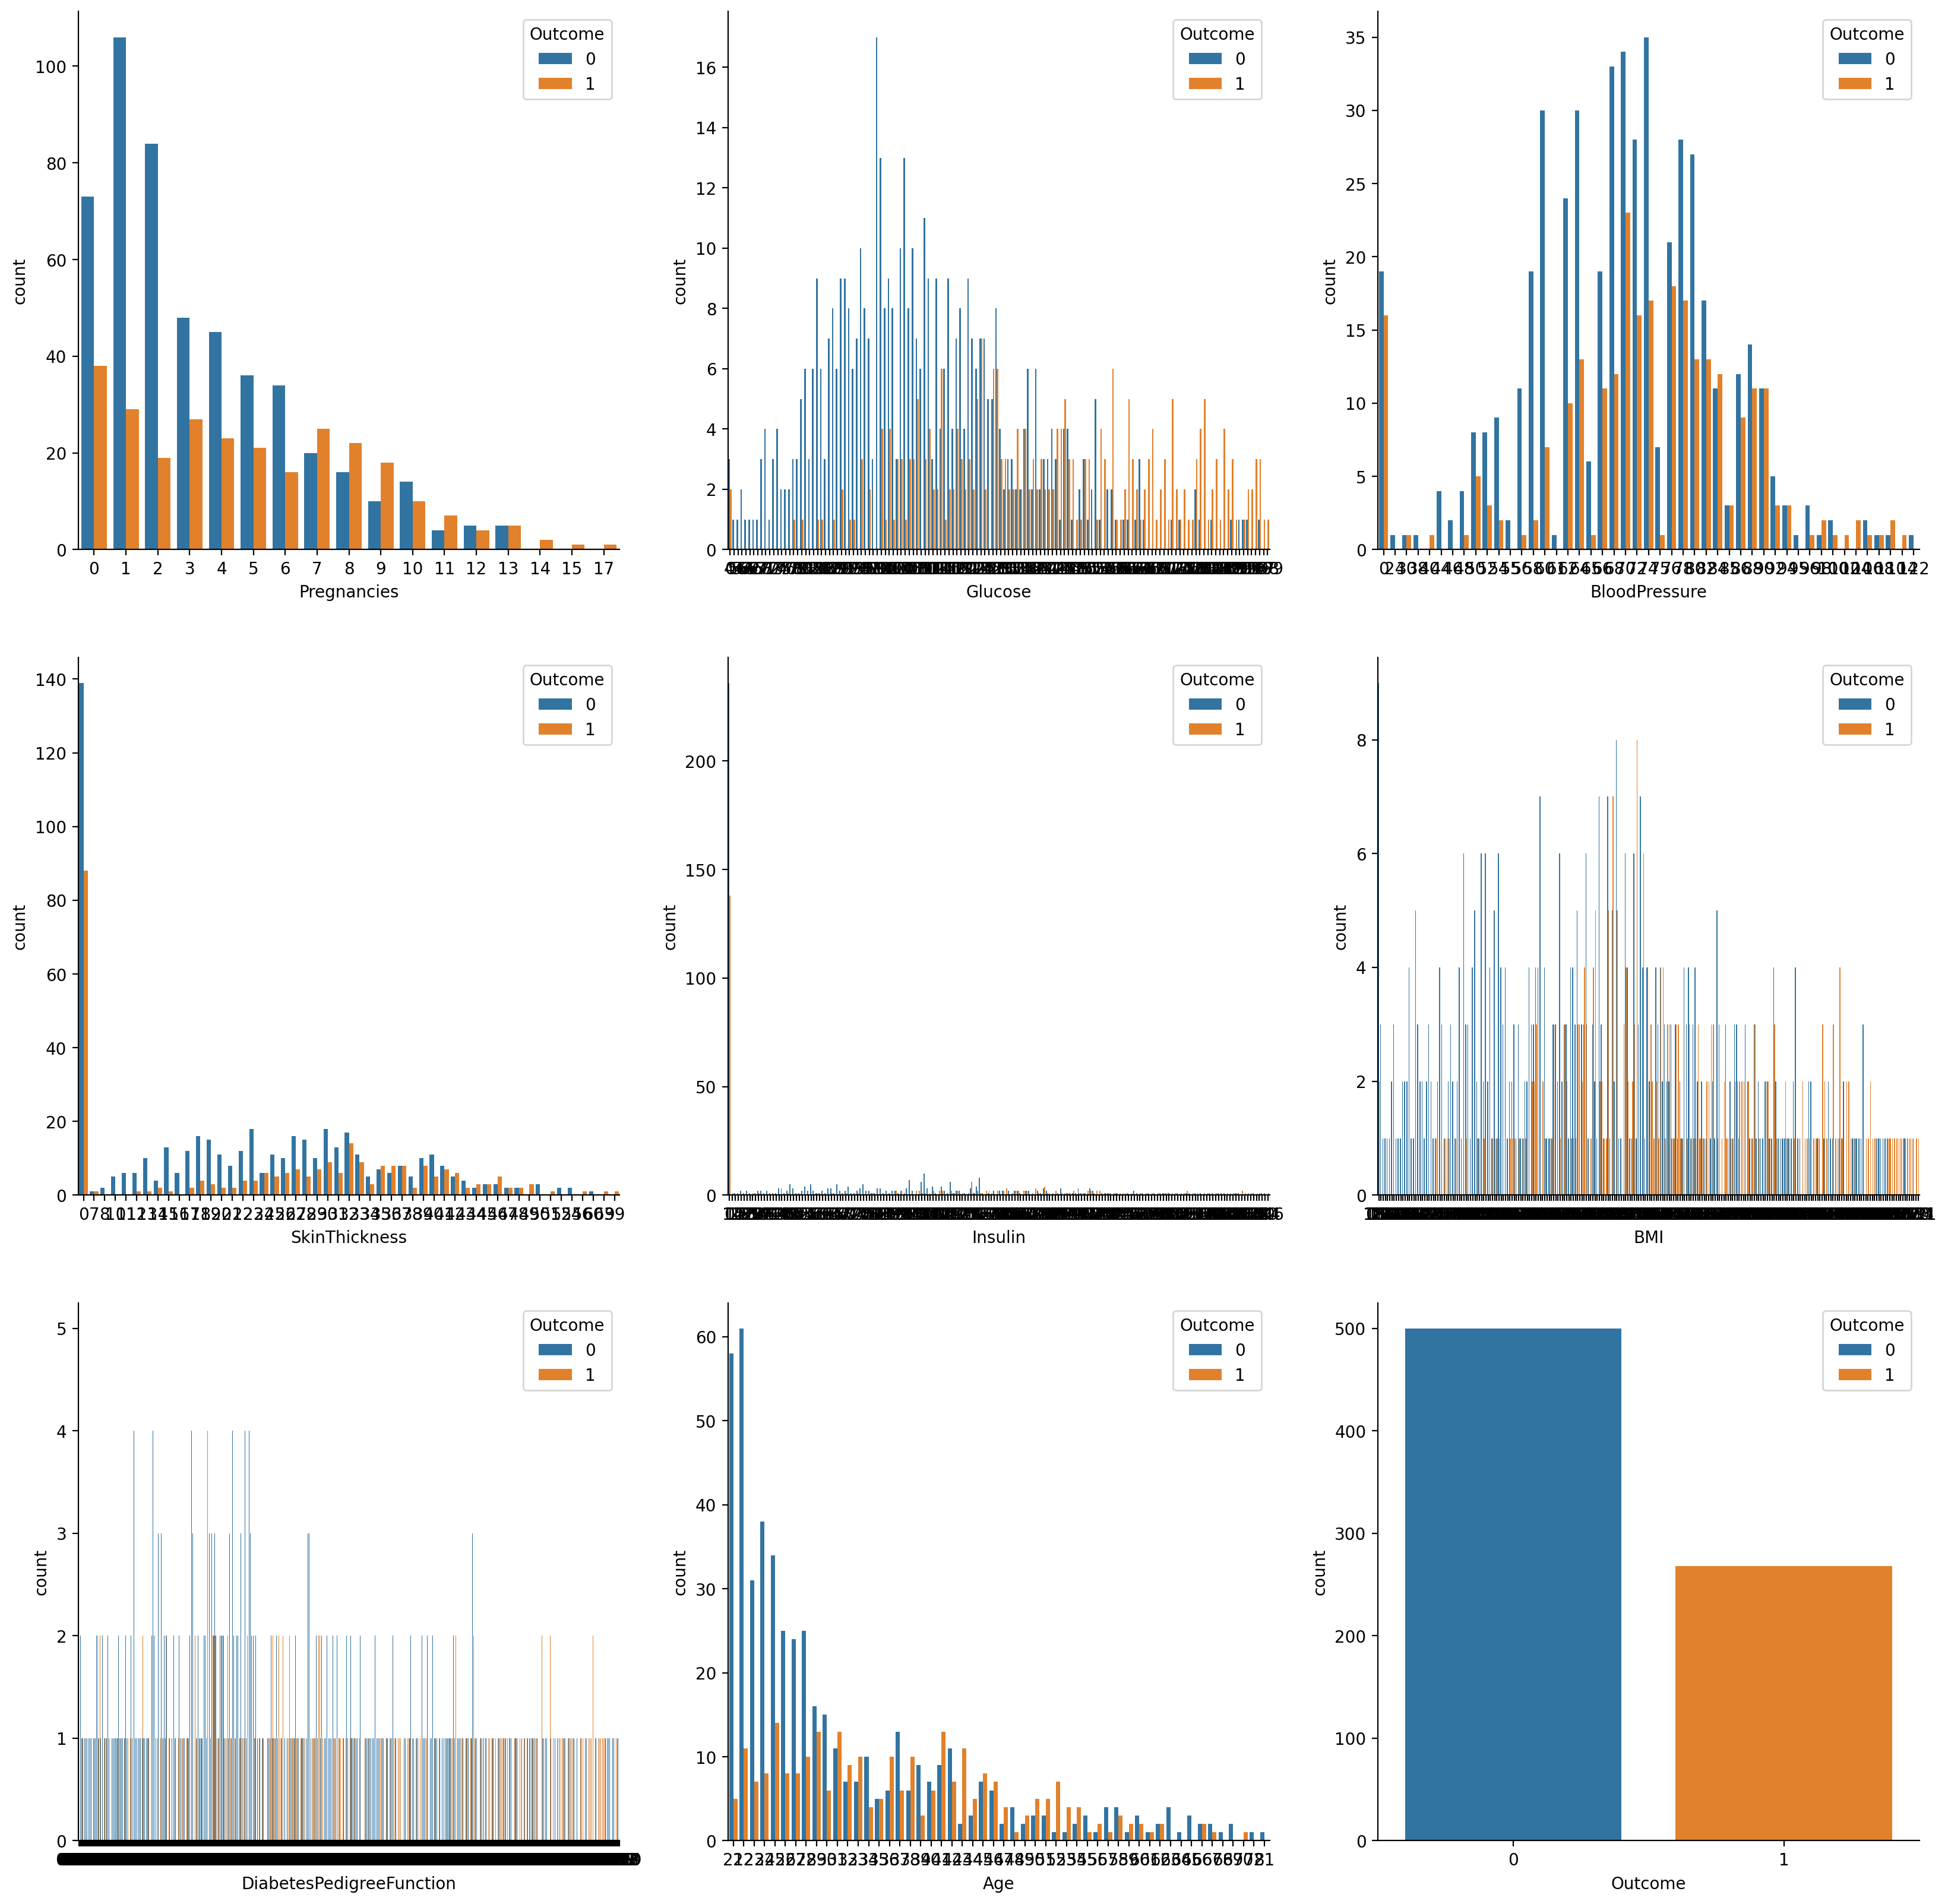

In [ ]:
attrs = dataset.columns

plt.figure(figsize=(20,20),dpi=200)

for i , feature in enumerate(attrs):   #enumerate(인덱스) ->인덱스와 값 2개를 추출
  plt.subplot(3,3,i+1)  #격자 3x3 준비
  sns.countplot(data=dataset, x =feature, hue = 'Outcome')  #hue는 기준을 정하는 옵션

sns.despine()

### 독립변수 X(시험지, feature)와 종속변수 y(답안지, label) 분리

In [ ]:
x= dataset.drop('Outcome',axis=1)
y=dataset['Outcome']


### 훈련셋 테스트셋 분리

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(x,y,
                                                      stratify=y,   #한쪽에만 데이터가 몰리지 않도록 설정
                                                    test_size=0.2,
                                                    random_state=1)
#test_size 분리 비율(0.2 x는80% y는20% 가용)
#random_state 데이터 고정 !32추천!
#결과 값 4개로 할당



In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


## 3.모델 구성
* Dense 신경망
* Dense(2^n , activation='활성화')

In [ ]:
model =Sequential()

model.add(Dense(32,input_shape=(8, ) , activation='relu' )) #Dense신경망
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

## 4.모델 설정
*하이퍼파라미터 튜닝


In [ ]:
model.compile(loss='binary_crossentropy', #손실
              optimizer='adam',
              metrics=['accuracy'])

## 5.모델 학습

In [ ]:
history = model.fit(X_train, y_train, epochs=300,batch_size=120)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3429 - loss: 8.0366
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4282 - loss: 5.6720 
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5329 - loss: 3.5317 
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6160 - loss: 2.1398 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6436 - loss: 1.5653
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6421 - loss: 1.0844
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6644 - loss: 0.9186
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6452 - loss: 0.8611
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6150 - loss: 0.7926 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6107 - loss: 0.7784 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5806 - loss: 0.7580 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6475 - loss

### 학습 결과 확인하기

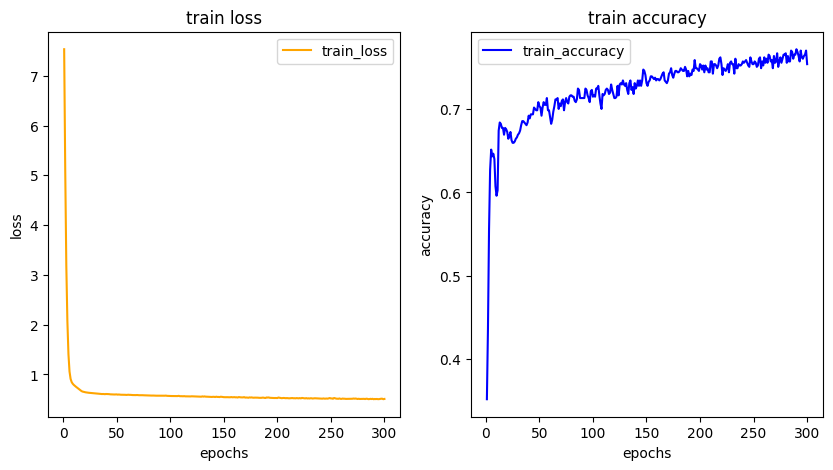

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

## 6.성능 평가

In [ ]:
scores = model.evaluate(X_test, y_test)
print('%s :  %.2f%%'%(model.metrics_names[1], scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6939 - loss: 0.5806  
compile_metrics :  66.88%


In [ ]:
model.metrics_names[1]

'compile_metrics'

In [ ]:
 scores[1]*100 #숫자가 고정된 것이 아님

66.88311696052551

In [ ]:
#훈련테스트로 y값 예측해보기
from sklearn import metrics
y_pred= (model.predict(X_test) > 0.5).astype('int')

print('accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('precision: ',metrics.precision_score(y_test,y_pred))
print('recall: ',metrics.recall_score(y_test,y_pred))
print('f1-score: ',metrics.f1_score(y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
accuracy:  0.6688311688311688
precision:  0.5348837209302325
recall:  0.42592592592592593
f1-score:  0.4742268041237113


### ROC코드

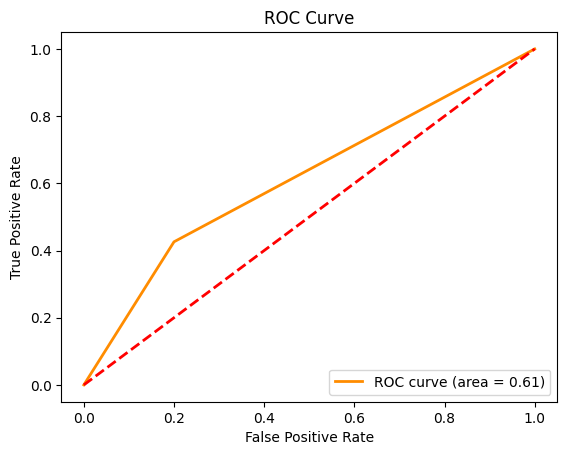

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_A, tpr_A, thr_A = roc_curve(y_test, y_pred)

auc_A = auc(fpr_A, tpr_A)

import matplotlib.pyplot as plt

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


plt.plot(fpr_A, tpr_A, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc_A)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()

# 스케일링작업 / 성능 올리기

1. 독립변수 개수 조절 / 학습에 필요없는 feature 제거
2. 훈련과 검증 비율 조절 / test_size(0.7,0.9), rand_state
3. 모델 구성 수정 / 히든층 추가,유닛 개수(32,8) 수정
4. 컴파일에서 옵티마이져 수정

*epochos 조절

성능평가

In [ ]:
# 인슐린 , D~~ feature제거  > Dens(input_shape 8-2수정)

#배치 사이즈 , 옵티마이져 rms

# feature제거  ,배치 사이즈 10 , test_size 0.1 ,

